# OpenCV Course

In [2]:
%matplotlib inline

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

## Image set

In [3]:
img_bgr = cv2.imread("./Images/sunflowers.png", cv2.IMREAD_COLOR) # Field of sunflowers
img_bgr = cv2.resize(img_bgr, (800, 800))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_bgr.shape

(800, 800, 3)

In [12]:
img_bgr = cv2.imread("./Images/musicSheet.png", cv2.IMREAD_COLOR) # Field of sunflowers
# img_bgr = cv2.resize(img_bgr, (800, 800))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_bgr.shape

(360, 542, 3)

## Image Enhancement

In [ ]:
def plotImages(imgArray, flag):
    plt.figure(figsize=(16,5))
    l = len(imgArray)
    for i in range(l):
        plt.subplot(1, l, i+1)
        if flag == 'gray':
            plt.imshow(imgArray[i], cmap='gray')
        else:
            plt.imshow(imgArray[i])
        plt.axis('off')
    plt.show()

### Brightness

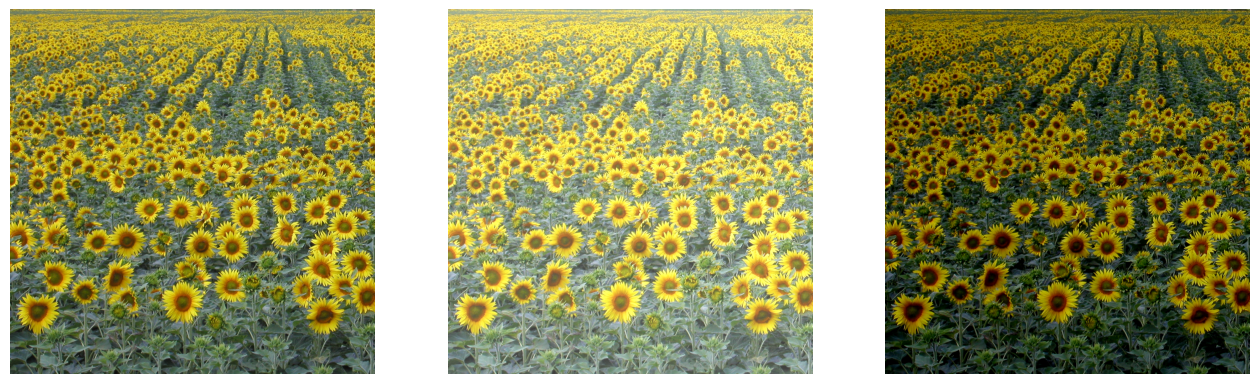

In [6]:
matrix = np.ones(img_bgr.shape, dtype="uint8")*50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

plotImages([img_rgb, img_rgb_brighter, img_rgb_darker], _)

### Contrast

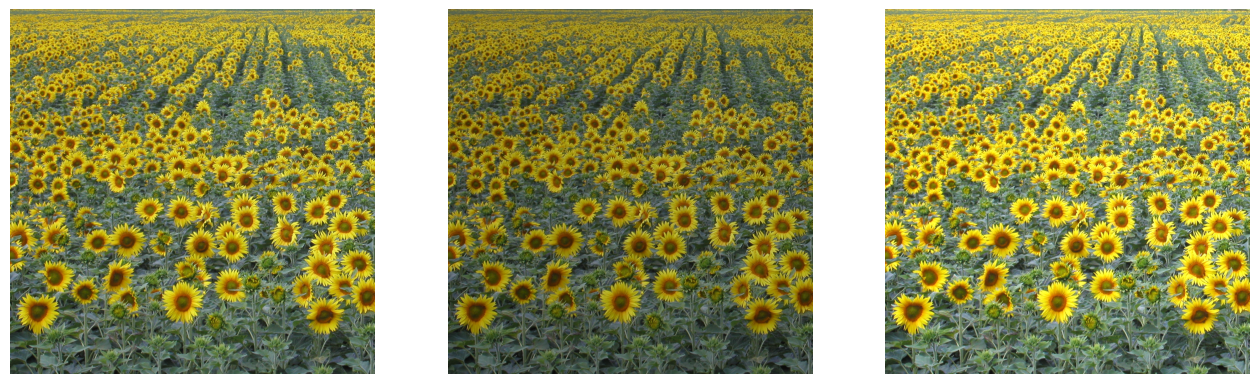

In [7]:
matrix1 = np.ones(img_bgr.shape, dtype="uint8")*0.8
matrix2 = np.ones(img_bgr.shape, dtype="uint8")*1.2

img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2)) # Overflow > 255
img_rgb_darker = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2), 0, 255))

plotImages([img_rgb, img_rgb_brighter, img_rgb_darker], _)

### Threshold
Transform grayscale images to black and white images

#### Application

Build an application that could read (decode) music sheets.

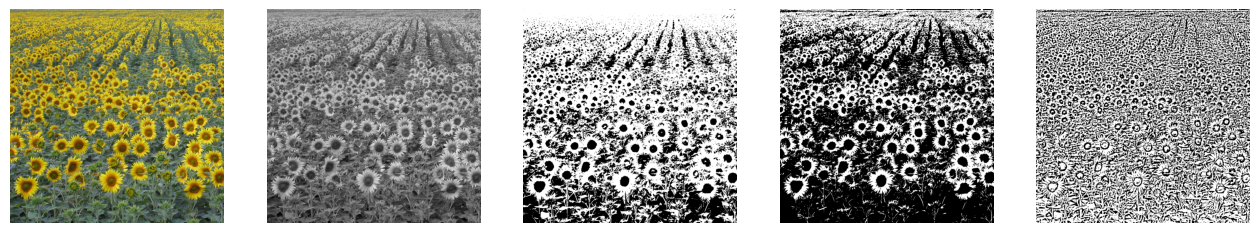

In [8]:
retval, img_tresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY) # Pixels with intensity <= 100 are set to 0 and those >= 100 to 255
retval, img_thresh_2 = cv2.threshold(img_gray, 130, 255, cv2.THRESH_BINARY)
img_thresh_adp = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plotImages([img_rgb, img_gray, img_tresh , img_thresh_2, img_thresh_adp], "gray")

### Bitwise operations

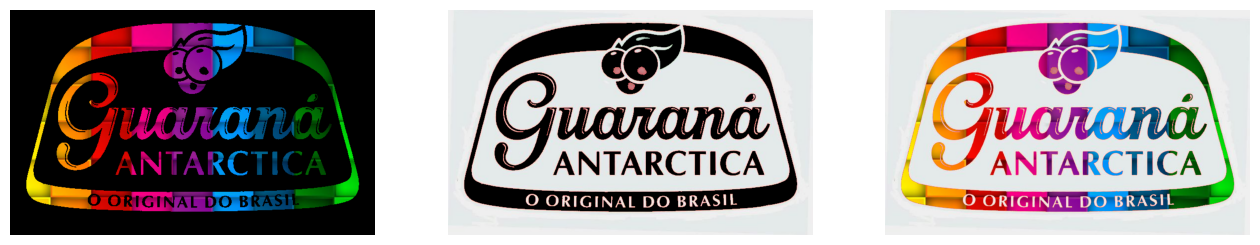

In [9]:
img1 = cv2.imread("./Images/guaranalogo.png")
img2 = cv2.imread("./Images/backgroundColoredSquares.png")

# Convert to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Resize background to match logo
height, width = img1.shape[:2]
img_background_rgb = cv2.resize(img2, (width, height), interpolation=cv2.INTER_AREA)

# Create mask and its inverse
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
_, img1_mask = cv2.threshold(img1_gray, 127, 255, cv2.THRESH_BINARY)
img1_mask_inv = cv2.bitwise_not(img1_mask)

# Mask background and logo
bg_part = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img1_mask_inv)
fg_part = cv2.bitwise_and(img1, img1, mask=img1_mask)

# Combine
img_full = cv2.add(bg_part, fg_part) # The masks are complementary, so the color values are added and never exceed 255

# Plot
plotImages([bg_part, fg_part, img_full], "gray")



## Drawing

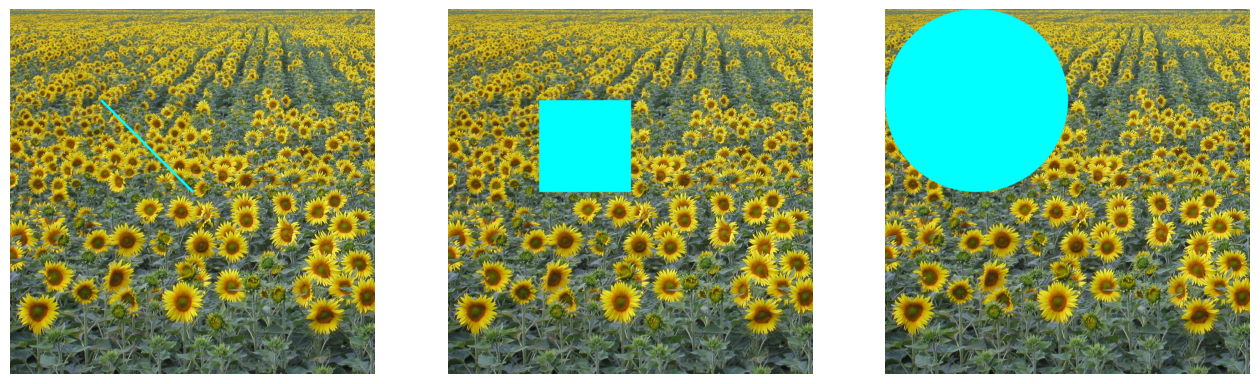

In [10]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# We must copy because those functions modify the image in-place
img_drawn_l = img_rgb.copy()
img_drawn_r = img_rgb.copy()
img_drawn_c = img_rgb.copy()


cv2.line(img_drawn_l, pt1=(200,200), pt2=(400, 400), color=(0, 255, 255), thickness=3, lineType=cv2.LINE_AA)
cv2.rectangle(img_drawn_r, pt1=(200,200), pt2=(400,400), color=(0, 255, 255), thickness=-2, lineType=cv2.LINE_AA) # Negative values in thickness make the object fully filled with color
cv2.circle(img_drawn_c, center=(200,200), radius=200, color=(0, 255, 255), thickness=-2, lineType=cv2.LINE_AA)

plotImages([img_drawn_l, img_drawn_r, img_drawn_c], _)

## Accessing the camera/video

In [11]:
# Manually set the source (0 for webcam, or a file path)
source = cv2.VideoCapture(0) # 0 if it is the camera

# Check if the source opened correctly
if not source.isOpened():
    print("Error: Cannot open video source")
else:
    window = 'Video Stream'
    cv2.namedWindow(window, cv2.WINDOW_NORMAL)

    while True:
        has_frame, frame = source.read()
        if not has_frame:
            break

        cv2.imshow(window, frame)

        # Exit on ESC key
        if cv2.waitKey(1) == 27:
            break

    source.release()
    cv2.destroyAllWindows()


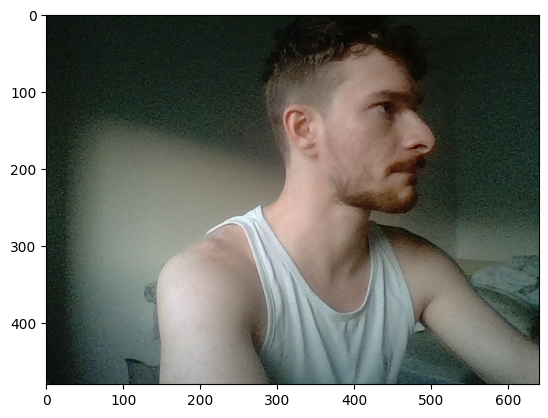

In [12]:
# Manually set the source (0 for webcam, or a file path)
source = cv2.VideoCapture(0) # 0 if it is the camera

# Check if the source opened correctly
if not source.isOpened():
    print("Error: Cannot open video source")

# Show only a frame of the video
_, frame = source.read()
plt.imshow(frame[..., ::-1])
plt.show()

source.release()
cv2.destroyAllWindows()

### Camera Filters

In [9]:
feature_params = dict(maxCorners = 500, # Maximum of corners
                      qualityLevel = 0.2, # Multiply the maximum feature by this value determining a threshold for other corners
                      minDistance = 15, # How close two corners can be in pixels
                      blockSize = 9) # Size of pixel neighboorhood

window = 'Video Capture'
cv2.namedWindow(window, cv2.WINDOW_NORMAL)
result = None

source = cv2.VideoCapture(0)

s = 0
if len(sys.argv) > 1:
    s = sys.argv[1]

img_filter = 0 # No filter

while True:
    has_frame, frame = source.read()

    if not has_frame:
        break
    if img_filter == 0:
        result = frame
    elif img_filter == 1: # Canny
        result = cv2.Canny(frame, 149, 150) # Parameters:  (frame, lower_thresh, upper_thresh) if the gradient of the pixels >=  upper_thresh : corner, pixels_g in (lower_thresh,  upper_thresh) : candidates
    elif img_filter == 2: # Blur
        result = cv2.blur(frame, (13,13),) # Parameters:  (frame, dimension_of_kernel)
    elif img_filter == 3: # Feature detection
        result = frame
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        corners = cv2.goodFeaturesToTrack(frame_gray, **feature_params)
        if corners is not None:
            for x,y in np.float32(corners).reshape(-1, 2):
                cv2.circle(result, (int(x), int(y)), 10, (0, 255, 0), 1)
    cv2.imshow(window, result)

    key = cv2.waitKey(1)
    if key == ord('Q') or key == ord('q') or key == 27:
        break
    elif key == ord('c') or key == ord('C'):
        img_filter = 1
    elif key == ord('B') or key == ord('b'):
        img_filter = 2
    elif key == ord('f') or key == ord('F'):
        img_filter = 3
    elif key == ord('P') or key == ord('p'):
        img_filter = 0

source.release()
cv2.destroyWindow(window)
    



    
    

## Interesting 

In [8]:
arr1 = np.array([200, 250], dtype=np.uint8).reshape(-1, 1)
arr2 = np.array([40, 40], dtype=np.uint8).reshape(-1, 1)
add_numpy = arr1+arr2 # numpy solves overflow (256 bits) using mod so the sum is going to be (arr1+arr2)%256
add_cv2 = cv2.add(arr1, arr2) # cv2 caps at 255, so the sum will be min(x, 255)

print(add_numpy)
print(add_cv2)

[[240]
 [ 34]]
[[240]
 [255]]
